tensorflow version : 1.14.0 <br>
keras version : 2.24.0

In [1]:
##############################################
# Modeling
##############################################
from keras import layers, models

#분산 방식 모델링 객체지향형
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)
        #최소제곱법(mse)과 SGD(Stochastic gradient descent)확률적 경사하강 
        self.compile(loss='mse', optimizer='sgd')

Using TensorFlow backend.


In [2]:
##############################################
# Data
##############################################
from sklearn import preprocessing
from keras import datasets

#Boston real estate price data
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)







Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 6s - loss: 534.7904 - val_loss: 324.7932
Epoch 2/100
 - 0s - loss: 144.6945 - val_loss: 85.6311
Epoch 3/100
 - 0s - loss: 80.4315 - val_loss: 73.5540
Epoch 4/100
 - 0s - loss: 66.0823 - val_loss: 77.7174
Epoch 5/100
 - 0s - loss: 60.1767 - val_loss: 57.6342
Epoch 6/100
 - 0s - loss: 57.7019 - val_loss: 67.8191
Epoch 7/100
 - 0s - loss: 79.9744 - val_loss: 53.4423
Epoch 8/100
 - 0s - loss: 48.9529 - val_loss: 91.6133
Epoch 9/100
 - 0s - loss: 62.6440 - val_loss: 62.4414
Epoch 10/100
 - 0s - loss: 46.5522 - val_loss: 50.9610
Epoch 11/100
 - 0s - loss: 41.5950 - val_loss: 45.6899
Epoch 12/100
 - 0s - loss: 39.6467 - val_loss: 40.0996
Epoch 13/100
 - 0s - loss: 37.8906 - val_loss: 53.3292
Epoch 14/100
 - 0s - loss: 43.1978 - val_loss: 41.6929
Epoch 15/100
 - 0s - loss: 43.0031 - val_loss: 46.3025
Epoch 16/100
 - 0s - loss: 34.7857 - val_loss: 46.0026
Epoch 17/100
 - 0s - loss: 33.5405 - val_loss: 35.1382
Epoch 18/100
 - 0s -

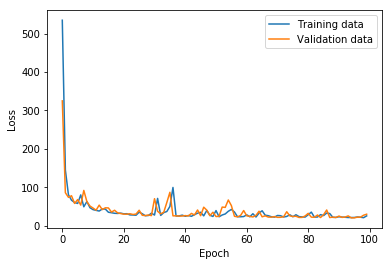

In [3]:
##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt
%matplotlib inline

##############################################
# Main
##############################################
def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()

    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)
    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))
    plot_loss(history)
    plt.show()
    
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    plt.show()

if __name__ == '__main__':
    main()